In [1]:
import functions as ft
import numpy as np

## Exercise 2

In [2]:
# For hermitian matrix
# I calculate the normalized spacing

N_size = 5
seed = 12345
flag = 0
type = "hermitian"

A, eigenvalues, norm_spacings = ft.compute_normalized_spacings(N_size, seed, flag, type)
print("Matrix is ", A)
print("ordered eigenvalues are ", eigenvalues)
print("normalized spacings are ", norm_spacings)

Matrix is  [[-0.20470766+0.12412128j  1.39340583+0.71354399j  1.00718936-0.56014529j
   0.88642934+2.35941881j -0.53974145-0.28634975j]
 [ 1.39340583-0.71354399j  0.09290788-0.83115354j -1.29622111+1.26593449j
  -2.00163731+0.19954296j  0.47698501-0.37798411j]
 [ 1.00718936+0.56014529j -1.29622111-1.26593449j  0.27499163+0.11982712j
  -0.37184254+1.54199553j  3.24894392+0.75388653j]
 [ 0.88642934-2.35941881j -2.00163731-0.19954296j -0.37184254-1.54199553j
   1.66902531-0.97073591j -1.02122752-0.33128565j]
 [-0.53974145+0.28634975j  0.47698501+0.37798411j  3.24894392-0.75388653j
  -1.02122752+0.33128565j -0.5770873 +1.34974221j]]
ordered eigenvalues are  [-4.89251946 -2.78728517  0.73837735  2.79516125  5.40139588]
normalized spacings are  [0.81804997 1.36999864 0.79922317 1.01272822]


## Exercise 3

### Hermitian Matrix

Fitting for flag 0...
# Generate using standard normal distribution
Fitted parameters:
 a = 16.7227, b = -3.0093, alpha = 2.7378, beta = 1.2988
Chi-square: 0.00016133634015801652


Fitting for flag 1...
# Generate values between -1 and 1
Fitted parameters:
 a = 0.0681, b = 1.0255, alpha = -0.4951, beta = 0.0000
Chi-square: 0.25280065856452455


Best flag: 0
Best chi-square value: 0.00016133634015801652
Best parameters: a = 16.7227, b = -3.0093, alpha = 2.7378, beta = 1.2988


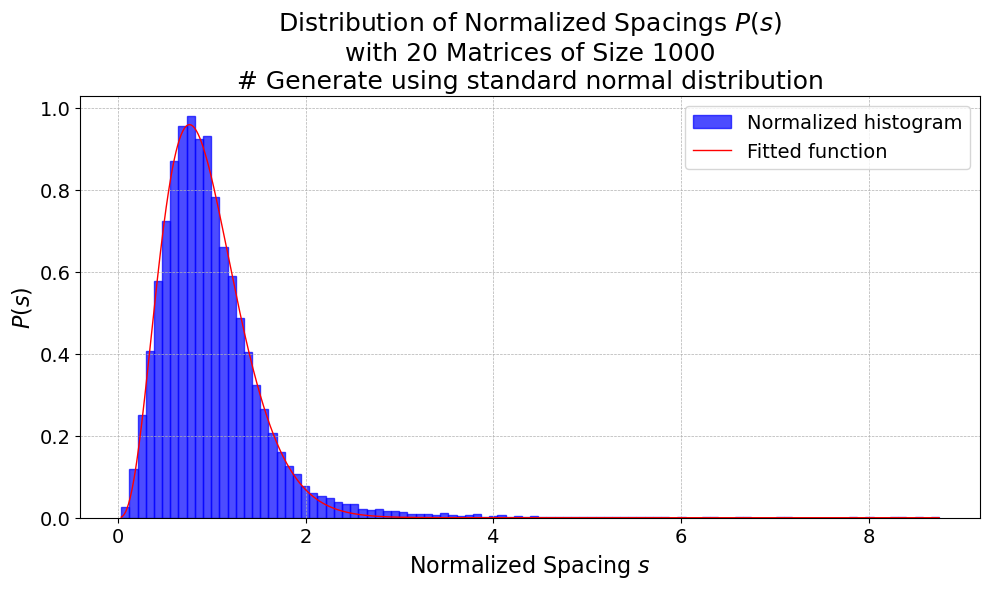

In [3]:
# I do the fitting for each flag, for the hermitian matrix only.

N = 1000  # Size of each matrix
num_matrices = 20  # Number of random matrices to accumulate data
N_bins = 100  # Number of bins for the histogram
flag = np.array([0,1])
type = "hermitian"

best_flag, best_chi_square, a_best, b_best, alpha_best, beta_best = ft.results(N,num_matrices, N_bins, flag, type)

I try and test the quantum random generator, still for the hermitian matrix. <br>
For this reason I repeat the same cell above fixing flag = 2. I do this threatment alone because the maximum N in this case is around N = 300.

Fitting for flag 2...
# Generate values with quantum number generator
Fitted parameters:
 a = 10.2223, b = -2.5291, alpha = 2.4214, beta = 1.3876
Chi-square: 0.0008295026379991476


Best flag: 2
Best chi-square value: 0.0008295026379991476
Best parameters: a = 10.2223, b = -2.5291, alpha = 2.4214, beta = 1.3876


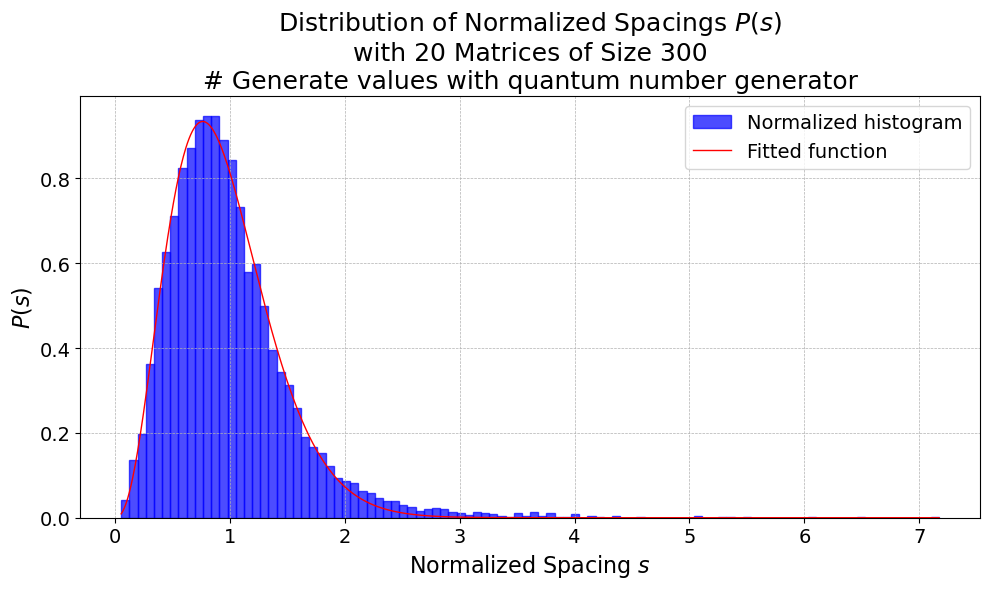

In [4]:
N = 300  # Size of each matrix
num_matrices = 20  # Number of random matrices to accumulate data
N_bins = 100
flag = np.array([2]) # Quantum Random Generator
type = "hermitian"

best_flag, best_chi_square, a_best, b_best, alpha_best, beta_best = ft.results(N,num_matrices, N_bins, flag, type)


### Diagonal matrix functions

Fitting for flag 0...
# Generate using standard normal distribution
Fitted parameters:
 a = 0.4589, b = -5.9917, alpha = -2.7461, beta = -72.7475
Chi-square: 2.8027293275727733e-05


Fitting for flag 1...
# Generate values between -1 and 1
Fitted parameters:
 a = 0.0000, b = 17.6830, alpha = -0.6205, beta = -0.0000
Chi-square: 0.13273208867455427


Best flag: 0
Best chi-square value: 2.8027293275727733e-05
Best parameters: a = 0.4589, b = -5.9917, alpha = -2.7461, beta = -72.7475


/home/sdruci/QIC/QIC/03_Assignement/functions.py:420: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(target_function, bin_centers, P_s, p0=initial_guess)
/home/sdruci/QIC/QIC/03_Assignement/functions.py:387: RuntimeWarning: overflow encountered in power
  return a * (s ** alpha) * np.exp(b * ( s ** beta))
/home/sdruci/QIC/QIC/03_Assignement/functions.py:387: RuntimeWarning: overflow encountered in exp
  return a * (s ** alpha) * np.exp(b * ( s ** beta))


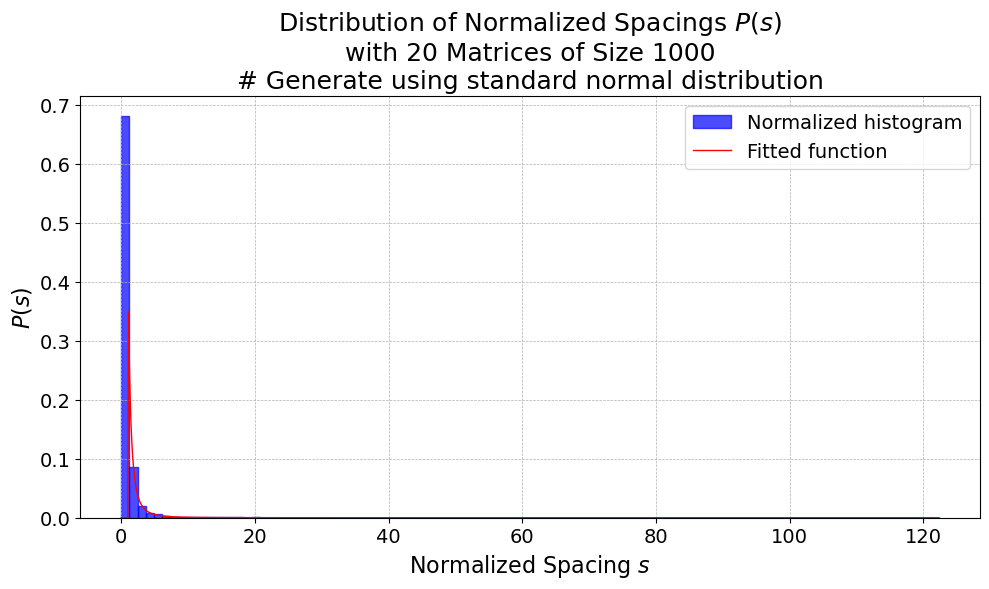

In [5]:
N = 1000  # Size of each matrix
num_matrices = 20  # Number of random matrices to accumulate data
N_bins = 100  # Number of bins for the histogram
flag = np.array([0,1])
type = "diagonal"

best_flag, best_chi_square, a_best, b_best, alpha_best, beta_best = ft.results(N,num_matrices, N_bins, flag, type)

## Sparse Matrices

In [7]:
N = 1000  # Size of each matrix
num_matrices = 20  # Number of random matrices to accumulate data
N_bins = 100
flag = 0         # Quantum Random Generator
type = "sparse"
density = 0.1

best_chi_square = float('inf')
best_flag = None
best_params = None
best_fit_P_s = None
best_spacings = None


spacings = ft.calculate_Ps_distribution(N, num_matrices, flag, type)

Fitting for flag 0...
# Generate using standard normal distribution
Fitted parameters:
 a = 14.8628, b = -2.9164, alpha = 2.5878, beta = 1.2940
Chi-square: 6.746901183324489e-05


Best flag: 0
Best chi-square value: 6.746901183324489e-05
Best parameters: a = 14.8628, b = -2.9164, alpha = 2.5878, beta = 1.2940


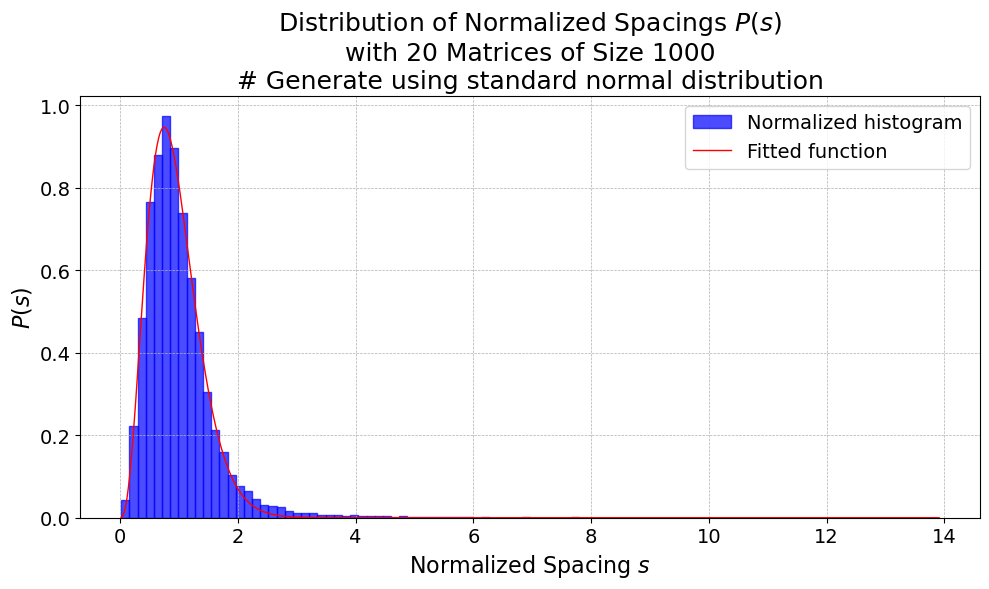

In [8]:
print(f"Fitting for flag {flag}...")
a, b, alpha, beta, chi_square, fitted_P_s = ft.fitting(N_bins, spacings, flag, type)

# Check if this chi-square is the best one so far
if chi_square < best_chi_square:
    best_chi_square = chi_square
    best_flag = flag
    best_params = (a, b, alpha, beta)
    best_fit_P_s = fitted_P_s
    best_spacings = spacings

# After finding the best flag, print the result
print(f"Best flag: {best_flag}")
print(f"Best chi-square value: {best_chi_square}")
print(f"Best parameters: a = {best_params[0]:.4f}, b = {best_params[1]:.4f}, alpha = {best_params[2]:.4f}, beta = {best_params[3]:.4f}")

# Plot the graph for the best flag
ft.plot_distr_and_fit(N_bins, best_spacings, num_matrices, N, best_flag, best_fit_P_s)
